## <center><img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/aria2cli.png' height="45" alt="aira2"/> <font size=6px >___Direct link downloader by SECUHEX___</font></center>

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 58.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
  

In [2]:
import pandas as pd

In [3]:
from huggingface_hub import list_datasets #give us all the data avaible  at hugging fase

In [4]:
from huggingface_hub import list_datasets #give us all the data avaible  at hugging fase

In [5]:
all_datasets = list_datasets()

In [6]:
all_datasets #it's not dowloading  data set but in fact it is just downloading the name of this dataset

<generator object HfApi.list_datasets at 0x7f68148ddbd0>

In [7]:
all_datasets = list_datasets()
num_datasets = len(list(all_datasets))  # Convert generator to list using list()
print(num_datasets)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


237725


In [8]:
'emotion' in all_datasets

False

In [9]:
'dair-ai/emotion' in all_datasets

False

In [10]:
#here we find where  all the all_datasets

In [11]:
from datasets import load_dataset
emotion = load_dataset('emotion')#here name of our data is emotion

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [12]:
emotion


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [13]:
emotion.set_format(type='pandas')# we have set here our dataset format to the pandas data form  and you will be able to see this data like as pandas data
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [14]:
df= emotion['train'][:] # data frame form
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [15]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [16]:
df.columns

Index(['text', 'label'], dtype='object')

In [17]:
#to get the class labels from  the dataset
emotion['train']


Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [18]:
classes = emotion['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [19]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [20]:
df['label_name']= df['label'].apply(lambda x:classes[x])

In [21]:
df.head() # we can see here the label with the label name

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


#now we have our data frame we gonna start data analysis
#why we  need data analysis >> to undersand more about our data set our class distribution and overall data distribution   




In [22]:
import matplotlib.pyplot as plt

In [23]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [24]:
label_count = df['label_name'].value_counts(ascending=True)

<Axes: xlabel='label_name'>

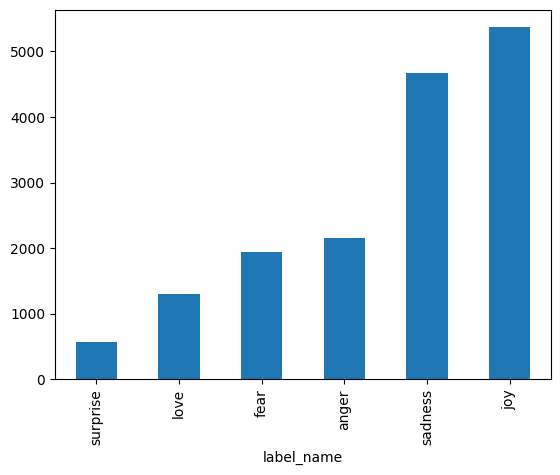

In [25]:
label_count.plot.bar()

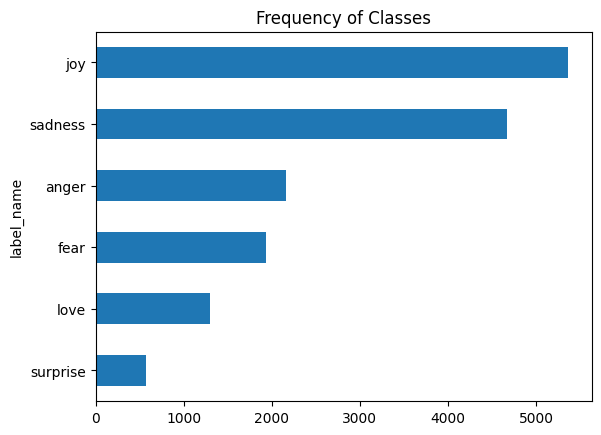

In [26]:

label_count.plot.barh()
#the h means horizontal and it's better in this case
plt.title('Frequency of Classes')
plt.show()

#(ascending=True) to get the large value on the top
#this says that our dataset is imbalance dataset
#info : if  you use a traditional maching learning algorithm in imbalance dataset  the preformnce of model wold not be sufficient but in case  of the transformers  are very  good to work with imbalanced data set although if you want too balance this data set you can use imbalance library  
#transformers are good to work with imbalanced dataset

In [27]:
#text to token
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df['Words Per Tweet']


,Words Per Tweet
0,4
1,21
2,10
3,18
4,4
...,...
15995,24
15996,20
15997,6
15998,14


<Axes: title={'center': 'Words Per Tweet'}, xlabel='label_name'>

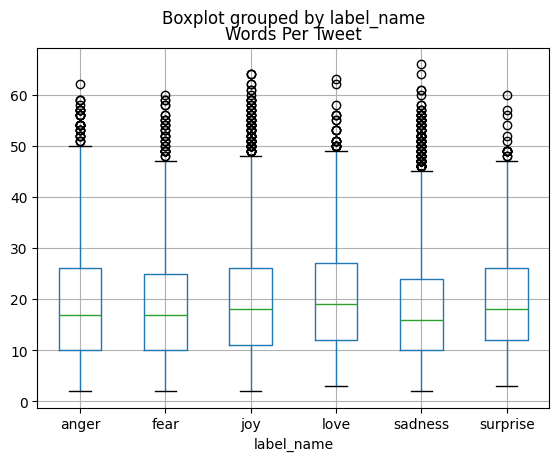

In [28]:
df.boxplot("Words Per Tweet", by='label_name')

In [29]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [30]:
text = "I love Machine Learning! . Tokenization is awesome"
encoded_text= tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 1012, 19204, 3989, 2003, 12476, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


#this numbers are the dictionary
#The first and the last one are special tokens
#the first one known as  CLS(a sentence is starting) and last one as separator(sentence has ended here)

In [31]:
#now convert ids into tokens to verify the tokenization
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'i', 'love', 'machine', 'learning', '!', '.', 'token', '##ization', 'is', 'awesome', '[SEP]']


In [32]:
#'token', '##ization' reduce the dictionnary size
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

#let's do the same thing in our dataset , Tokenizationn of the emotion Dataset

In [33]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

HERE WE GONNA DO TOKANIZATION FOR OUR HAUL DATA

In [34]:
emotion.reset_format()

In [35]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [36]:
#map function
def tokenize(batch):
    temp = tokenizer(batch['text'], padding=True, truncation=True) #all the sentences doesn't have an equal lengthbut maching learning algorithm need all those legnths equal so in tha case we going to do the padding here length is not matching  we will badding those data with zero

#Padding data with zeros typically refers to adding zeros to the beginning or end of sequences to make them a uniform length.
#Truncation refers to the process of cutting off or removing parts of a sequence to make it fit within a certain length constraint
    return temp
print(tokenize(emotion['train'][:5]))


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0], [101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [37]:
emotion_encoded = emotion.map(tokenize, batched=True, batch_size=None)
#passing this method in the map function then batch will pass train
#split as a whole data then test split as whole data and then validation
#is split as whole data

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [38]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [39]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [40]:
text

'I love Machine Learning! . Tokenization is awesome'

In [41]:
input = tokenizer(text, return_tensors='pt')
input

{'input_ids': tensor([[  101,  1045,  2293,  3698,  4083,   999,  1012, 19204,  3989,  2003,
         12476,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

build model

In [42]:
from transformers import AutoModel
import torch

In [43]:
model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [44]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [45]:
#ge embedding
with torch.no_grad():
  outputs = model(**input)
last_hidden_states = outputs.last_hidden_state


In [46]:
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.0886, -0.2149, -0.1689,  ..., -0.0873,  0.2789,  0.5058],
         [ 0.4888,  0.1527, -0.1430,  ...,  0.0074,  0.5571,  0.4564],
         [ 0.6903,  0.6416,  0.4528,  ..., -0.0707,  0.4100,  0.1986],
         ...,
         [-0.0752,  0.0228,  0.1196,  ..., -0.0155,  0.0925,  0.5272],
         [ 0.3473, -0.1479,  0.1116,  ...,  0.1363, -0.0076,  0.0483],
         [ 0.9303,  0.1891, -0.5633,  ...,  0.0727, -0.6529, -0.1950]]]), hidden_states=None, attentions=None)

In [47]:
last_hidden_states

tensor([[[-0.0886, -0.2149, -0.1689,  ..., -0.0873,  0.2789,  0.5058],
         [ 0.4888,  0.1527, -0.1430,  ...,  0.0074,  0.5571,  0.4564],
         [ 0.6903,  0.6416,  0.4528,  ..., -0.0707,  0.4100,  0.1986],
         ...,
         [-0.0752,  0.0228,  0.1196,  ..., -0.0155,  0.0925,  0.5272],
         [ 0.3473, -0.1479,  0.1116,  ...,  0.1363, -0.0076,  0.0483],
         [ 0.9303,  0.1891, -0.5633,  ...,  0.0727, -0.6529, -0.1950]]])

In [48]:
last_hidden_states.shape

torch.Size([1, 12, 768])

In [49]:
from transformers import AutoModelForSequenceClassification


In [50]:
num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")#will check if GPU is available in my machine  it will use GPU FOR TRAINING THE MODEL OTHERWISE IT WILL USE CPU
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels= num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
device

device(type='cuda')

In [52]:
from transformers import TrainingArguments

In [53]:
!pip install transformers[torch]
!pip install -U accelerate

In [54]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f'Device: {torch.cuda.get_device_name(0)}')
else:
    device = torch.device('cpu')
    print('Device: CPU')


Device: Tesla T4


In [55]:
!nvidia-smi


Sun Nov  3 22:10:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              28W /  70W |    395MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [56]:
batch_size = 64
model_name = "distilbert-finetuned-emotion"

training_args = TrainingArguments(output_dir = model_name,
                                 num_train_epochs=2,
                                 learning_rate = 2e-5,
                                 per_device_train_batch_size= batch_size,
                                 per_device_eval_batch_size = batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy = 'epoch',
                                  disable_tqdm=False)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [57]:
from transformers import Trainer
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [58]:
trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotion_encoded['train'],
                  eval_dataset=emotion_encoded['validation'],
                  tokenizer=tokenizer)

<ipython-input-58-a023a1e812eb>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [59]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.287094,0.912000,0.911616
2,0.504200,0.206429,0.928000,0.927910


TrainOutput(global_step=500, training_loss=0.5041620788574219, metrics={'train_runtime': 284.0931, 'train_samples_per_second': 112.639, 'train_steps_per_second': 1.76, 'total_flos': 720342861696000.0, 'train_loss': 0.5041620788574219, 'epoch': 2.0})

In [60]:
#let's test our model
preds_outputs = trainer.predict(emotion_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.21482257544994354,
 'test_accuracy': 0.917,
 'test_f1': 0.9163178184882492,
 'test_runtime': 3.6547,
 'test_samples_per_second': 547.237,
 'test_steps_per_second': 8.756}

very good accuracy  

plot a confusion matrix just to understand that where this particular thing is going wrong all

In [61]:
import numpy as np
y_preds = np.argmax(preds_outputs.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [62]:
from sklearn.metrics  import classification_report
print(classes)
print (classification_report(y_true, y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       581
           1       0.94      0.93      0.94       695
           2       0.77      0.82      0.79       159
           3       0.92      0.92      0.92       275
           4       0.87      0.90      0.89       224
           5       0.83      0.59      0.69        66

    accuracy                           0.92      2000
   macro avg       0.88      0.86      0.86      2000
weighted avg       0.92      0.92      0.92      2000



In [63]:
label_count

,count
label_name,
surprise,572
love,1304
fear,1937
anger,2159
sadness,4666
joy,5362


In [64]:
text = "I AM SAD"

In [65]:

input_encoded= tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
  output=model(**input_encoded)
logits = output.logits
pred = torch.argmax(logits, dim=1).item()
pred
output
pred, classes[pred]



(0, 'sadness')